## Process data

Load the gea data, take only the two most abundant classes (bc their example is binary classification). Select only the initial 97 residues to use in pretraining of the model, as done before.

In [1]:
# set directory of this repo so that all paths can be absolute/relative (not ended with a '/')
path_prefix = '/home/mexposit/cg/gea'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def rev_comp(seq):
    revcomp = ''
    for nt in seq:
        if nt.upper() == 'A':
            revcomp = revcomp+'T'
        elif nt.upper() == 'G':
            revcomp = revcomp+'C'
        elif nt.upper() == 'C':
            revcomp = revcomp+'G'
        elif nt.upper() == 'T':
            revcomp = revcomp+'A'
        else:
            raise ValueError(f'Unrecognized nucleotide {nt}')
    return revcomp[::-1]

In [4]:
rev_comp('ATCG')

'CGAT'

### Load data

In [5]:
train_vals = pd.read_csv(f'{path_prefix}/data/train_values.csv', index_col=0)
train_labl = pd.read_csv(f'{path_prefix}/data/train_labels.csv', index_col=0)

In [6]:
train_vals.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_labl.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### There are sequence duplicates, remove them

Aprox 500 entries

In [8]:
train_vals.shape

(63017, 40)

In [9]:
train_vals.drop_duplicates('sequence', inplace=True)

In [10]:
train_vals.shape

(62643, 40)

Also make the change in the labels

In [11]:
train_labl = train_labl.loc[train_vals.index].copy()

In [12]:
train_vals.shape

(62643, 40)

### Count which labs are more abundant

Reverse one hot encoding of labels

In [13]:
labs = train_labl.columns

In [14]:
labels = train_labl.apply(lambda x: labs[np.array(x.values, dtype=bool)][0], axis=1)

In [15]:
top10_abundant_labs = labels.value_counts()[:10]

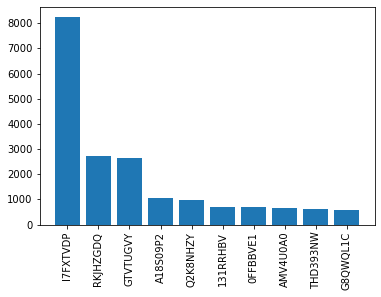

In [16]:
plt.bar(x=top10_abundant_labs.index, height=top10_abundant_labs.values)
plt.xticks(rotation = 90)
plt.show()

Since the first class is very very abundant, and the 2nd and 3rd are mostly equal, I will go for the 2nd and 3rd ones.

### Get seqs of 2nd and 3rd most abundant labs

In [17]:
print(top10_abundant_labs[1:3])

RKJHZGDQ    2732
GTVTUGVY    2660
dtype: int64


In [18]:
sele_labs = top10_abundant_labs[1:3].index.to_list()
print(sele_labs)

['RKJHZGDQ', 'GTVTUGVY']


In [19]:
sele_index = labels[(labels == sele_labs[0]) | (labels == sele_labs[1])]
print(sele_index.value_counts())
print(sele_index)

RKJHZGDQ    2732
GTVTUGVY    2660
dtype: int64
sequence_id
L49BX    RKJHZGDQ
6VLZP    RKJHZGDQ
J54VR    RKJHZGDQ
Q3PS9    RKJHZGDQ
CIPPO    RKJHZGDQ
           ...   
O1SJN    RKJHZGDQ
8MMHC    RKJHZGDQ
U15WY    RKJHZGDQ
506VJ    RKJHZGDQ
4DMNR    RKJHZGDQ
Length: 5392, dtype: object


In [20]:
sele_train = train_vals.loc[sele_index.index].copy()

In [21]:
sele_train = sele_train.join(sele_index.rename('label'))
sele_train = sele_train[['sequence','label']]

In [22]:
sele_train.head()

,sequence,label
sequence_id,,
L49BX,CACCGTCGATCCGGACCGCCACATCGAGCGGGTCACCGAGCTGCAA...,RKJHZGDQ
6VLZP,TTCGGCCTATTGGTTAAAAAATGAGCTGATTTAACAAAAATTTAAC...,RKJHZGDQ
J54VR,CTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCC...,RKJHZGDQ
Q3PS9,CTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCC...,RKJHZGDQ
CIPPO,CCCGGGGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCATAG...,RKJHZGDQ


/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


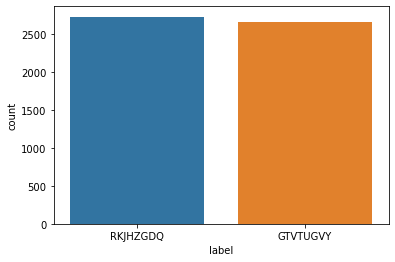

In [23]:
sns.countplot(sele_train.label)
plt.show()

### Get only the first 100 residues of the sequences

In [24]:
sele_train['sequence_100'] = [seq[:100] for seq in sele_train['sequence']]

In [25]:
sele_train['sequence_100'].value_counts()

CCCGGGTGCAAAGATGGATAAAGTTTTAAACAGAGAGGAATCTTTGCAGCTAATGGACCTTCTAGGTCTTGAAAGGAGTGGGAATTGGCTCCGGTGCCCG    2705
CGTTACATAACTTACGGTAAATGGCCCGCCTGGCTGACCGCCCAACGACCCCCGCCCATTGACGTCAATAATGACGTATGTTCCCATAGTAACGCCAATA     108
GTGAACCGTCAGATCCGCTAGCGCTACCGGACTCAGATCTCGAGCTCAAGCTTCGAATTCTGCAGTCGACGGTACCGCGGGCCCGGGATCCACCGGTCGC      58
CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCATAGCCCATATATGGAGTTCCGCGTTACATAACTTACGGTAAATGGCCCGCCTGG      37
CATGTTCTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCCATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCATAG      29
                                                                                                        ... 
TGGACGAGCTGTACAAGTCCGGAGAAGGGCAAGGGCAAGGGCAAGGGCCGGGCCGCGGCTACGCGTATCGATCCATGTTCGAGGCGCGCCTGGTCCAGGG       1
CCTTGCTCACCATGGTGGCGACCGGTGGATCCCGGGCCCGCGGTACCGTCGACTGCAGAATTCGAAGCTTGAGCTCGAGACAGAAGAGTTTGAGAAAGCA       1
GACGAGCTGTACAAGTCCGGACTCAGATCTGGTGGCTCCGCAGGATCCCGGCAAGAAGAAGCAAAGGCTGCTGTAGGTGTGACTGGAAATGACATCACTA       1
ACGTCAGATCCGCTAGCCG

Taking the first 100nts of the sequence is not useful, as the ones of one class always start with the same sequence

In [26]:
sele_train[sele_train['sequence_100'] == 'CCCGGGTGCAAAGATGGATAAAGTTTTAAACAGAGAGGAATCTTTGCAGCTAATGGACCTTCTAGGTCTTGAAAGGAGTGGGAATTGGCTCCGGTGCCCG'].label.value_counts()

RKJHZGDQ    2705
Name: label, dtype: int64

## Take a random selection of the sequence and Rev complement too

Just select a random portion of the sequence and do reverse complement randomly



Avoid N nucleotides in the selected sequences

In [27]:
seq_len = 101

random_seq_sele = []

np.random.seed(42)

for seq in sele_train['sequence']:
    # if sequence is shorter, take entire sequence and it will be padded
    # if it has a N on it, this is a problem and would be better to manually analyze and discard this observation before running cell
    if len(seq) <= seq_len:
        if 'N' in seq.upper(): 
            raise ValueError("Can't process sequences, found a sequence shorter than seq_len and with a N character...discard this sequence")
        # with probability 0.5 make the Reverse Complement of that sequence
        if np.random.rand() > .5:
            random_seq_sele.append(seq)
        else:
            random_seq_sele.append(rev_comp(seq))
    else:
        # if sequence is longer, need to randomly select a subsequence
        subseq ='' # initialize to enter while
        # keep looking for subsequences until they do not have any N (this might bias a bit the initial positions)
        while ('N' in subseq.upper()) or (len(subseq) != seq_len):
            start_pos = np.random.randint(len(seq) - seq_len + 1)
            subseq = seq[start_pos:start_pos+seq_len]
        # with probability 0.5 make the Reverse Complement of that sequence
        if np.random.rand() > .5:
            random_seq_sele.append(subseq)
        else:
            random_seq_sele.append(rev_comp(subseq))

In [28]:
sele_train['random_seq_sele'] = random_seq_sele

In [29]:
# there are 225 repeats in this subset, not a problem, it can just happen by random selection and it is not much compared to 5000 total examples
print(sele_train['random_seq_sele'].shape)
print(np.sum(sele_train['random_seq_sele'].value_counts() > 1))

(5392,)
221


## Conver to kmers

In [30]:
kmer_size = 6

Use their function seq2kmer from `motif/motif_utils.py`

In [31]:
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

Example

In [32]:
print('Kmer length including spaces and everything')
len(seq2kmer(sele_train['random_seq_sele'][0], kmer_size))

Kmer length including spaces and everything


671

In [33]:
print('Kmer view')
seq2kmer(sele_train['random_seq_sele'][0], kmer_size)

Kmer view


'AAGGGT AGGGTG GGGTGT GGTGTT GTGTTG TGTTGC GTTGCT TTGCTC TGCTCT GCTCTC CTCTCA TCTCAA CTCAAT TCAATG CAATGA AATGAT ATGATT TGATTT GATTTC ATTTCA TTTCAT TTCATT TCATTA CATTAA ATTAAT TTAATG TAATGG AATGGT ATGGTT TGGTTC GGTTCA GTTCAA TTCAAT TCAATT CAATTT AATTTT ATTTTT TTTTTA TTTTAA TTTAAT TTAATT TAATTT AATTTC ATTTCT TTTCTT TTCTTT TCTTTT CTTTTC TTTTCT TTTCTT TTCTTC TCTTCT CTTCTG TTCTGG TCTGGT CTGGTT TGGTTT GGTTTA GTTTAA TTTAAA TTAAAA TAAAAT AAAATT AAATTC AATTCA ATTCAA TTCAAG TCAAGT CAAGTT AAGTTT AGTTTA GTTTAA TTTAAA TTAAAG TAAAGT AAAGTG AAGTGA AGTGAA GTGAAA TGAAAG GAAAGT AAAGTG AAGTGT AGTGTA GTGTAA TGTAAT GTAATA TAATAT AATATG ATATGC TATGCA ATGCAC TGCACC GCACCC CACCCA ACCCAT'

In [34]:
print('Number of kmers')
len(seq2kmer(sele_train['random_seq_sele'][0], kmer_size).split(' '))

Number of kmers


96

**Look at example data**

Example data is a series of kmers spaced out by ' ' signals, followed by the label in a tab. 

In [35]:
example_data = pd.read_csv(f'{path_prefix}/dnabert/examples/sample_data/ft/6/dev.tsv', sep='\t')

In [36]:
example_data

,sequence,label
0,GTGGGG TGGGGA GGGGAG GGGAGG GGAGGG GAGGGA AGGG...,0
1,GTGTGG TGTGGG GTGGGA TGGGAT GGGATC GGATCA GATC...,0
2,CCCTGC CCTGCA CTGCAT TGCATG GCATGC CATGCC ATGC...,0
3,TTGGAG TGGAGC GGAGCA GAGCAA AGCAAG GCAAGG CAAG...,0
4,AGCACA GCACAG CACAGG ACAGGG CAGGGC AGGGCA GGGC...,0
...,...,...
995,GGGCTG GGCTGC GCTGCA CTGCAG TGCAGG GCAGGC CAGG...,1
996,CTGACC TGACCC GACCCT ACCCTA CCCTAG CCTAGC CTAG...,0
997,ACTTAC CTTACT TTACTG TACTGT ACTGTA CTGTAC TGTA...,1
998,CTGAGC TGAGCC GAGCCT AGCCTG GCCTGG CCTGGC CTGG...,0


In [37]:
len(example_data['sequence'].values[0].split(' '))

96

All have 96 kmers, and a binary label

In [38]:
pd.Series([len(seq.split(' ')) for seq in example_data['sequence']]).value_counts()

96    1000
dtype: int64

In [39]:
sele_train['kmer_rand'] = [seq2kmer(seq, kmer_size) for seq in sele_train['random_seq_sele']]

In [40]:
sele_train['bin_label'] = [1 if lab == sele_labs[0] else 0 for lab in sele_train['label']]

In [41]:
final_data = sele_train[['kmer_rand','bin_label']].copy()

In [42]:
final_data.bin_label.value_counts()

1    2732
0    2660
Name: bin_label, dtype: int64

In [43]:
final_data.rename({'kmer_rand':'sequence', 'bin_label':'label'}, axis=1, inplace=True)

In [44]:
final_data

,sequence,label
sequence_id,,
L49BX,AAGGGT AGGGTG GGGTGT GGTGTT GTGTTG TGTTGC GTTG...,1
6VLZP,GGGGGC GGGGCG GGGCGG GGCGGT GCGGTG CGGTGT GGTG...,1
J54VR,GCACGA CACGAA ACGAAC CGAACC GAACCC AACCCC ACCC...,1
Q3PS9,GGCCCG GCCCGA CCCGAG CCGAGC CGAGCT GAGCTT AGCT...,1
CIPPO,TTCTTC TCTTCT CTTCTA TTCTAG TCTAGT CTAGTG TAGT...,1
...,...,...
O1SJN,AACTTC ACTTCA CTTCAT TTCATT TCATTT CATTTT ATTT...,1
8MMHC,ATGACA TGACAG GACAGT ACAGTA CAGTAA AGTAAG GTAA...,1
U15WY,GGTACG GTACGT TACGTC ACGTCC CGTCCC GTCCCT TCCC...,1


## Split data

Original finetuning data is split between a dev.tsv file with 1000 observations and a train.tsv file with 32367 observations. I think the dev set is used during training to evaluate the accuracy on a held-out dataset (test accuracy). So I will do the same here, although probably 1000 observations is too much since my whole dataset is only 5000.

In [45]:
dev_set = np.random.choice(final_data.index, 1000, replace=False)

In [46]:
dev_data = final_data.loc[dev_set].copy()

In [47]:
train_data = final_data.loc[~final_data.index.isin(dev_set)].copy()

They are balanced

/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


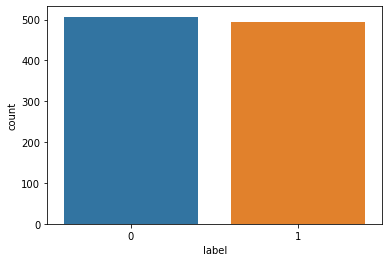

In [48]:
sns.countplot(dev_data.label)
plt.show()

/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


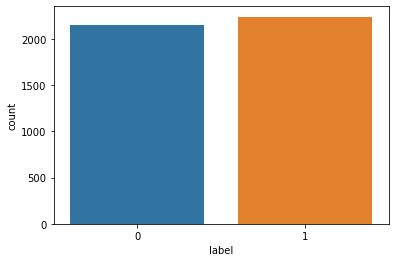

In [49]:
sns.countplot(train_data.label)
plt.show()

### Export

Finally, export this dataframes in the appropriate format and in a .csv file that could be read back to pandas (which contains information about the indices!)

In [50]:
train_data.to_csv(f'{path_prefix}/transformers/2_geainit/in_data/train_data.csv')
dev_data.to_csv(f'{path_prefix}/transformers/2_geainit/in_data/dev_data.csv')

Model will use these tsv files.

In [51]:
train_data.to_csv(f'{path_prefix}/transformers/2_geainit/in_data/train.tsv', sep='\t', index=False)
dev_data.to_csv(f'{path_prefix}/transformers/2_geainit/in_data/dev.tsv', sep='\t', index=False)